In [2]:
import torch

In [1]:
import torch
from src.mode_collapse import mode_collapse_experiment

#### **Explanation of `opt` Parameters**

The `opt` or (`opt_gan`) dictionary defines the key hyperparameters and settings for training a GAN model. Below is the explanation of each parameter:

- **`device`**: 
  Specifies whether the computations will run on a GPU (`"cuda"`) or a CPU (`"cpu"`) depending on the hardware availability. 
  - `"cuda"`: Uses GPU for faster training.
  - `"cpu"`: Uses CPU if no GPU is available.

- **`num_epochs`**:
  The total number of epochs for training the GAN. An epoch is one complete pass through the dataset.

- **`batch_size`**:
  The number of samples processed in a single forward/backward pass. Larger batch sizes typically stabilize training but require more memory.
- **`n_critic`**:
  Number of discriminator (critic) updates performed per generator update. Often set to more than 1 for Wasserstein GANs to improve discriminator performance.

- **`lr`**:
  The learning rate for both the generator and discriminator optimizers. A smaller value helps in stabilizing GAN training.

- **`latent_size`**:
  The size of the latent vector (noise vector) input to the generator. Larger values give the generator more capacity to learn complex patterns.

- **`mode`**:
  Specifies the GAN mode or loss function to be used. Options include:
  - `"normal"`: Standard GAN loss.
  - `"wasserstein"`: Wasserstein GAN loss.
  - `"wasserstein-gp"`: Wasserstein GAN with gradient penalty for improved stability.

- **`img_plot_periodicity`**:
  Frequency (in epochs) to generate and save sample images for visualizing training progress. For example, images are plotted every 500 epochs.

- **`clip_w`**:
  Weight clipping threshold for the discriminator (critic). Used only in Wasserstein GANs. 
  - If set to `0.0`: Weight clipping is disabled.
  - If set to a positive value: Discriminator weights are clipped to the range `[-clip_w, clip_w]`.

- **`num_samples`**:
  The total number of samples to be drawn from the real distribution during training.

In [2]:
opt_gan = {
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "num_epochs": 1000,
    "n_critic": 5,
    "img_plot_periodicity": 500,
    "lr": 0.00001,
    "latent_size": 32,
    "num_samples": 10000,
    "batch_size": 500,
    "mode": "normal",  # Options: 'normal', 'wasserstein', 'wasserstein-gp'
    "clip_w": 0.0,  # Set to a positive value to enable weight clipping
}

The file `mode_collapse.py` contains a class that's realizes the experiment. Basically it consists in creating synthetic data (a mixture of 8 Gaussian distributions) on which a **simple** pair of generator and discriminator are trained according to the previous parameters. We observe mode collapsing in the case of GANs, but not in the case of DCGAN.

#### 1. **Mode collapse for GANs**

In [6]:
mce_gan = mode_collapse_experiment(opt_gan)

Epoch Progress:   0%|                                                      | 0/1000 [00:00<?, ?it/s]

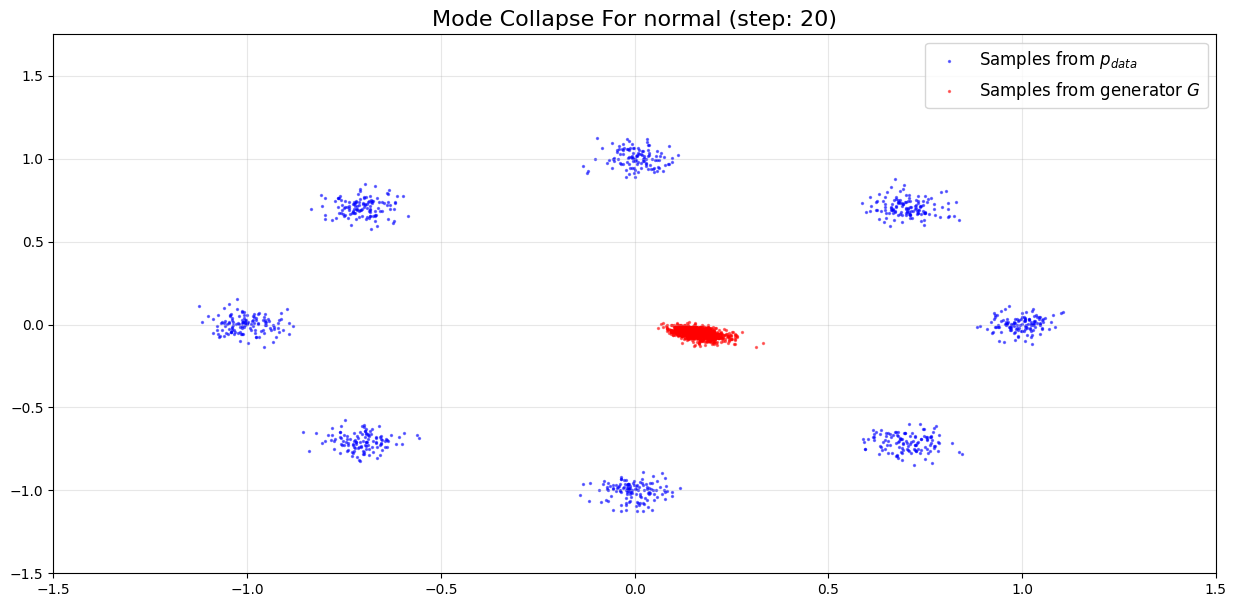

Epoch Progress:  50%|█████████████████████▉                      | 499/1000 [02:31<02:31,  3.30it/s]

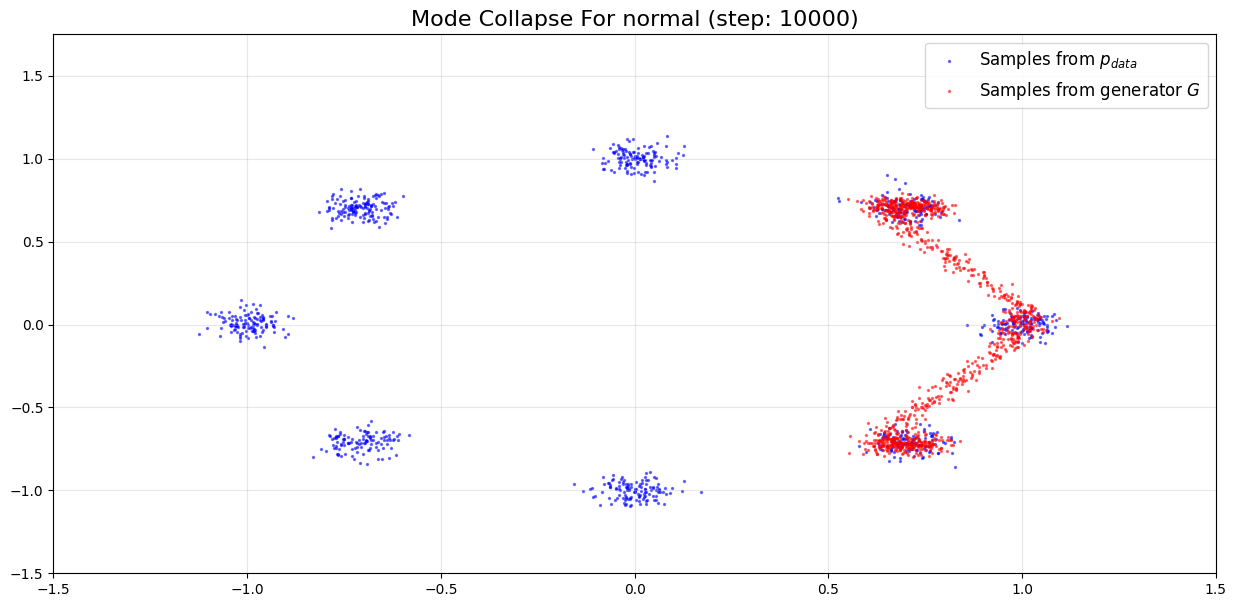

Epoch Progress: 100%|███████████████████████████████████████████▉| 999/1000 [04:59<00:00,  3.50it/s]

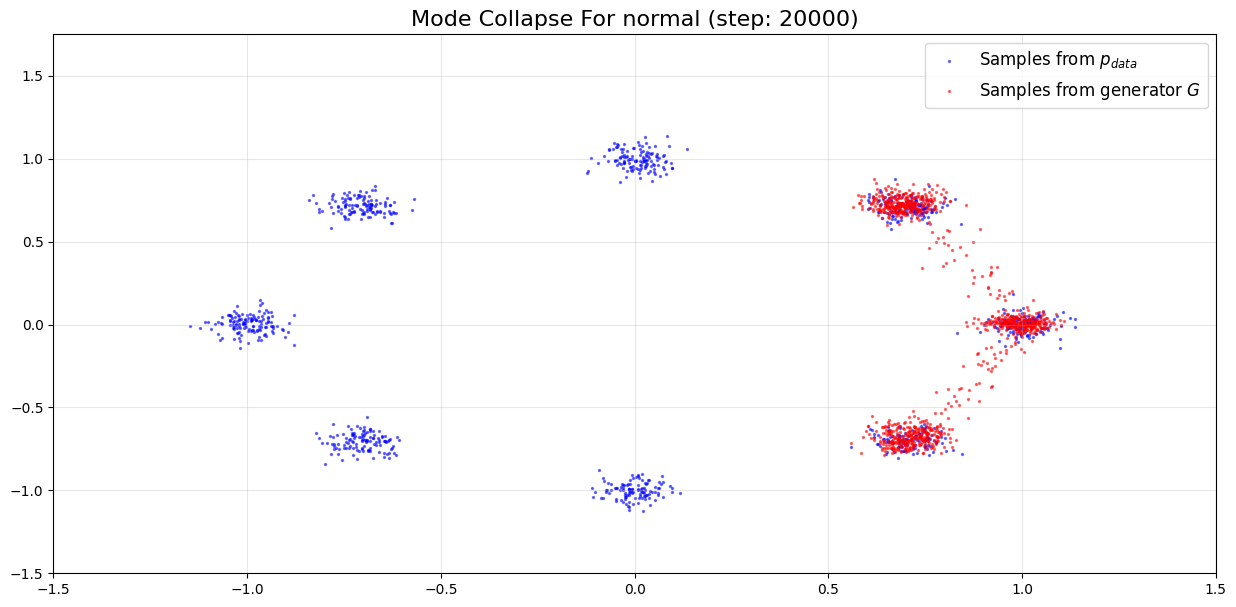

Epoch Progress: 100%|███████████████████████████████████████████| 1000/1000 [05:00<00:00,  3.33it/s]


In [7]:
mce_gan.mode_collapse()

#### 2. **Mode collapse for WGANs**

In [6]:
opt_wgan = {
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "num_epochs": 1000,
    "n_critic": 5,
    "img_plot_periodicity": 500,
    "lr": 0.00001,
    "latent_size": 32,
    "num_samples": 10000,
    "batch_size": 500,
    "mode": "wasserstein",  # Options: 'normal', 'wasserstein', 'wasserstein-gp'
    "clip_w": 0.01,  # Set to a positive value to enable weight clipping
}

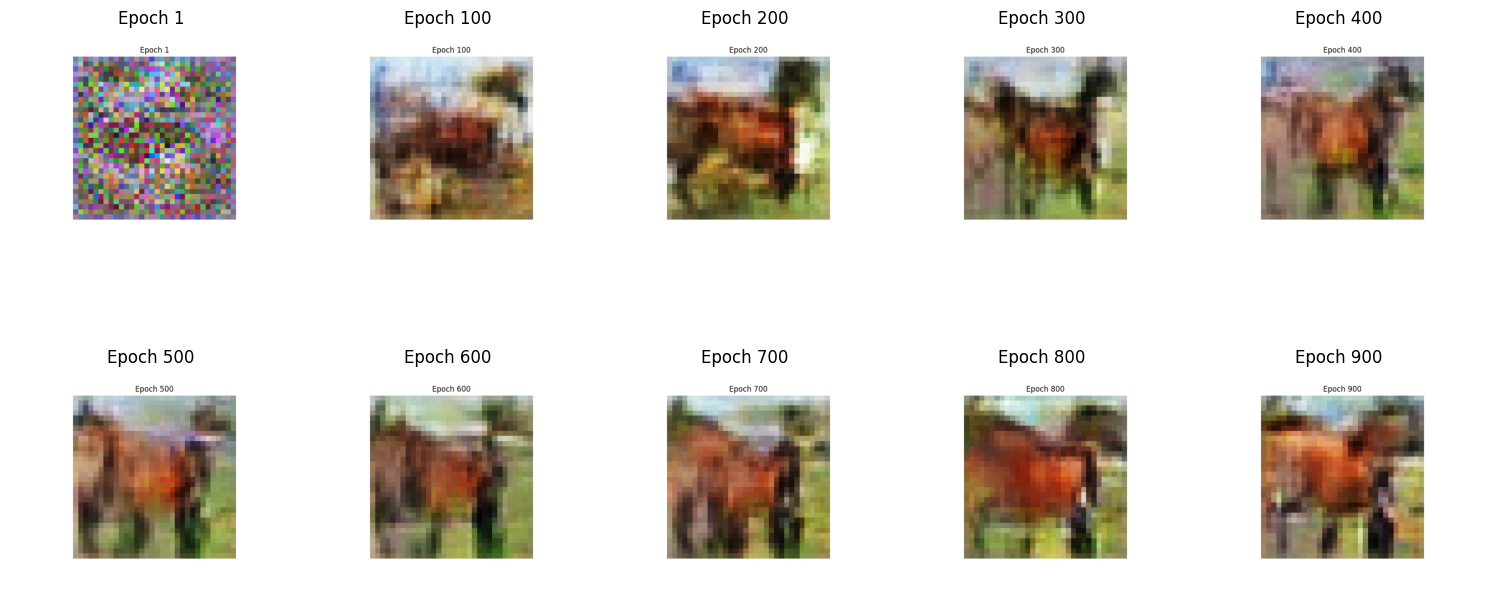

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# List of epochs for which you have generated images
epochs = [1, 100, 200, 300, 400, 500, 600, 700, 800, 900]

# Directory containing the images
image_dir = './generated_images'  # Change this path to your directory

# Create a 3x5 grid for the images
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

# Flatten the axes array to easily iterate over
axes = axes.flatten()

# Loop through each epoch and corresponding axis to plot the images
for i, epoch in enumerate(epochs):
    img_path = os.path.join(os.getcwd(), f'WGAN_generated_image_epoch_{epoch}.png')
    img = mpimg.imread(img_path)
    
    axes[i].imshow(img)
    axes[i].axis('off')  # Remove axis for a cleaner look
    axes[i].set_title(f'Epoch {epoch}')

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()